### Car Price Prediction Assignment
Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. The company wants to know:

- Which variables are significant in predicting the price of a car

- How well those variables describe the price of a car

In [1]:
#import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv(r"CarPrice_Assignment.csv")
pd.set_option('max_columns',None)           # this line of code show all the columns
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
#checking null values
df.isnull().sum() 

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
# changing the values of column CarName into lower case 
df['CarName']=df['CarName'].apply(lambda x: x.lower())
df['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [7]:
df['CarName']=df['CarName'].apply(lambda x: x.split(" ",1))
df['CarName']

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, quadrifoglio]
3                   [audi, 100 ls]
4                    [audi, 100ls]
                  ...             
200             [volvo, 145e (sw)]
201                 [volvo, 144ea]
202                 [volvo, 244dl]
203                   [volvo, 246]
204                 [volvo, 264gl]
Name: CarName, Length: 205, dtype: object

In [8]:
#making 2 columns car_company and car_model
df[['car_company','car_model']]=pd.DataFrame(df.CarName.to_list(),index=df.index)

                      

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model
0,1,3,"[alfa-romero, giulia]",gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,"[alfa-romero, stelvio]",gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,"[alfa-romero, quadrifoglio]",gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,quadrifoglio
3,4,2,"[audi, 100 ls]",gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,"[audi, 100ls]",gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [10]:
df['car_model'].unique()

array(['giulia', 'stelvio', 'quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'mu-x', 'd-max ', 'd-max v-cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cli

In [11]:
df['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
#define a function of replace
def repl(a,dict1):
    for x,y in dict1.items():
        a=a.replace(x,y)
    return a
    

In [13]:
dict1={"alfa-romero":"alfa romeo","maxda":"mazda","porcshce":"porsche","toyouta":"toyota","vokswagen":"volkswagen","vw":"volkswagen"}

In [14]:
a=df['car_company']

In [15]:
# change the wrong name of car company with the help of  func 
df['car_company']=repl(a,dict1)
df['car_company']

0      alfa romeo
1      alfa romeo
2      alfa romeo
3            audi
4            audi
          ...    
200         volvo
201         volvo
202         volvo
203         volvo
204         volvo
Name: car_company, Length: 205, dtype: object

In [16]:
df['car_company'].unique()

array(['alfa romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
b=df.corr()
b

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

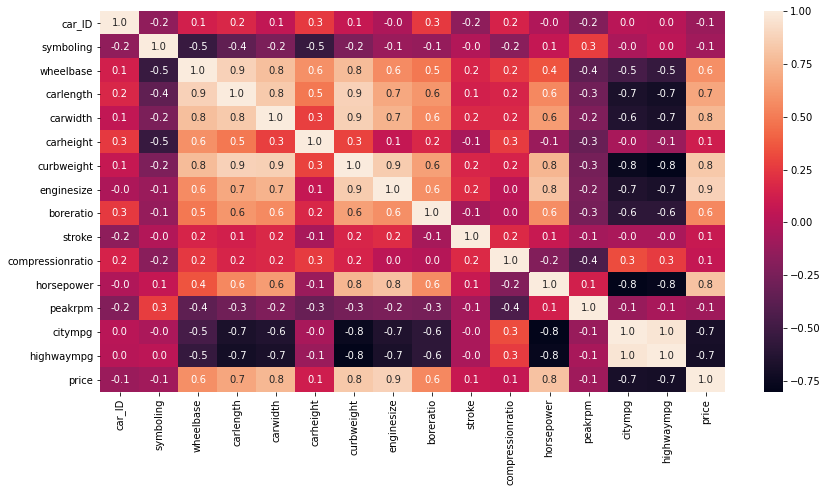

In [18]:
plt.figure(figsize=(14,7))
sb.heatmap(b,annot=True,fmt=".1f")

In [19]:
df['car_company'].value_counts()


toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
plymouth       7
audi           7
saab           6
porsche        5
isuzu          4
chevrolet      3
jaguar         3
alfa romeo     3
renault        2
mercury        1
Name: car_company, dtype: int64

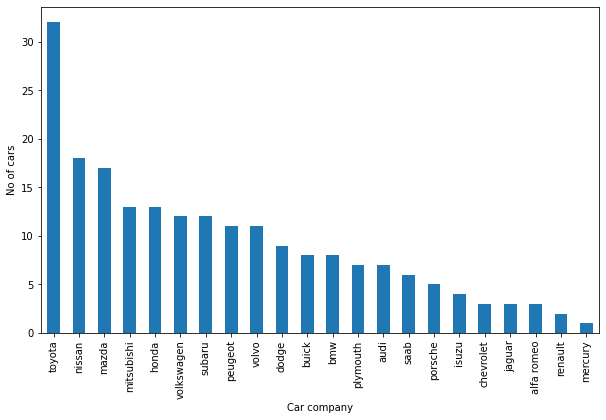

In [20]:
plt.figure(figsize=(10,6))
df['car_company'].value_counts().plot(kind="bar")
plt.xlabel("Car company")
plt.ylabel("No of cars")
plt.show()

####  Toyota is most favorable car and mercury is least favorable car

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
#drop unnecessary columns 
df1=df.drop(['car_ID','CarName','car_model'],axis=1)
df1.info()                                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [23]:
# change the column data type
df1['symboling']=df1['symboling'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [24]:
#  check unique values of all categorical columns
print(df1['symboling'].unique())
print(df1['fueltype'].unique())
print(df1['aspiration'].unique())
print(df1['doornumber'].unique())
print(df1['carbody'].unique())
print(df1['drivewheel'].unique())
print(df1['enginelocation'].unique())
print(df1['enginetype'].unique())
print(df1['cylindernumber'].unique())
print(df1['car_company'].unique())
print(df1['fuelsystem'].unique())


['3' '1' '2' '0' '-1' '-2']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['alfa romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


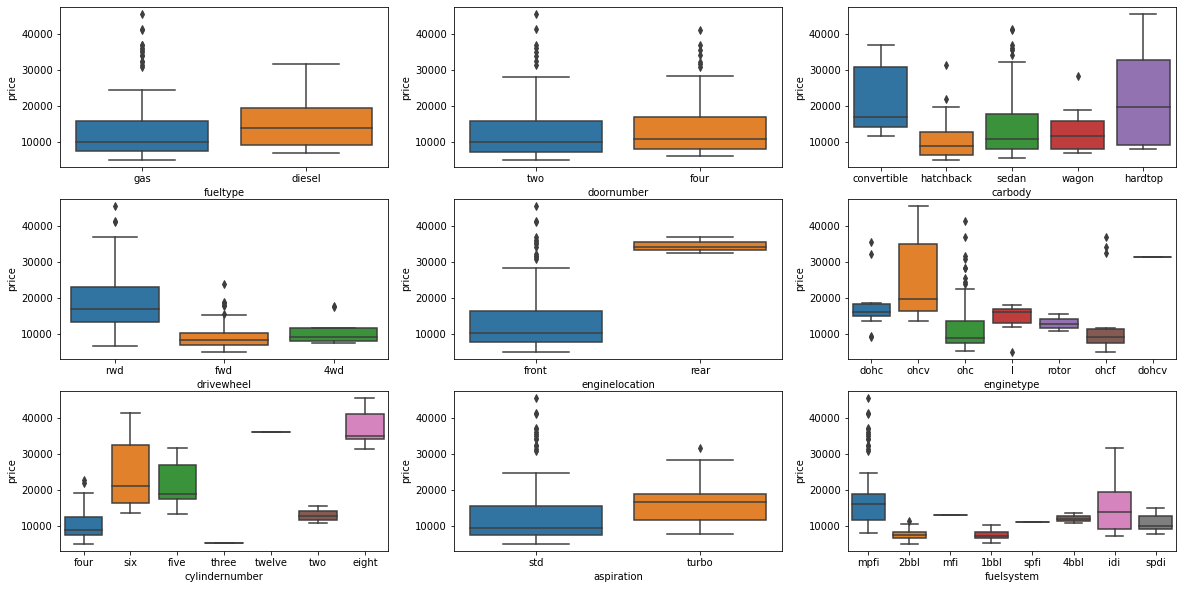

In [25]:
# plot all the categorical columns
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sb.boxplot(x='fueltype',y='price',data=df1)


plt.subplot(3,3,2)
sb.boxplot(x='doornumber',y='price',data=df1)

plt.subplot(3,3,3)
sb.boxplot(x='carbody',y='price',data=df1)

plt.subplot(3,3,4)
sb.boxplot(x='drivewheel',y='price',data=df1)

plt.subplot(3,3,5)
sb.boxplot(x='enginelocation',y='price',data=df1)

plt.subplot(3,3,6)
sb.boxplot(x='enginetype',y='price',data=df1)

plt.subplot(3,3,7)
sb.boxplot(x='cylindernumber',y='price',data=df1)

plt.subplot(3,3,8)
sb.boxplot(x='aspiration',y='price',data=df1)

plt.subplot(3,3,9)
sb.boxplot(x='fuelsystem',y='price',data=df1)
plt.show()

### 1- Diesel cars are  more price than gas cars 2- Doornumber don't affect on price of cars 3 - hardtop type carbody has  more price than others 4 - rwd type drivewheel has higest price than others 5 - rear engine location has very high price than front engine location 6 -  price are affected by the number of cylinder number 7- turbo aspiration has more price than standard

In [26]:
df1.shape

(205, 25)

In [27]:
cor=df1.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

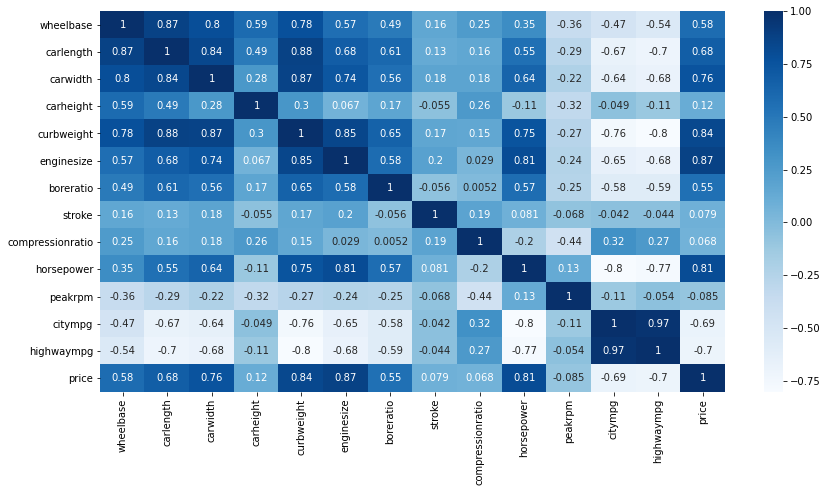

In [28]:
plt.figure(figsize=(14,7))
sb.heatmap(cor,annot=True,cmap='Blues')

### the highly correlated columns with respect  to price   

In [29]:
# all the important numeric columns from correlation matrix  
num_imp_col=['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
             'citympg','highwaympg']

In [30]:
# all the object columns 
df1.select_dtypes(include=['object']).columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'car_company'],
      dtype='object')

In [31]:
# all the important categorical columns from boxplot 
cate_imp_col=['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber',
              'fuelsystem','car_company'] 


# symboling & doornumber are not significant columns that's why don't add in imp columns


In [32]:
# all the imp numeric & categorical columns 
all_imp_col=['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
             'citympg','highwaympg','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype',
             'cylindernumber','fuelsystem','car_company']

In [33]:
car=df1[all_imp_col]
car.shape

(205, 19)

In [34]:
car.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,dohc,four,mpfi,alfa romeo
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,dohc,four,mpfi,alfa romeo
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,gas,std,hatchback,rwd,front,ohcv,six,mpfi,alfa romeo
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,gas,std,sedan,fwd,front,ohc,four,mpfi,audi
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,gas,std,sedan,4wd,front,ohc,five,mpfi,audi


In [35]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   wheelbase       205 non-null    float64
 2   carlength       205 non-null    float64
 3   carwidth        205 non-null    float64
 4   curbweight      205 non-null    int64  
 5   enginesize      205 non-null    int64  
 6   boreratio       205 non-null    float64
 7   horsepower      205 non-null    int64  
 8   citympg         205 non-null    int64  
 9   highwaympg      205 non-null    int64  
 10  fueltype        205 non-null    object 
 11  aspiration      205 non-null    object 
 12  carbody         205 non-null    object 
 13  drivewheel      205 non-null    object 
 14  enginelocation  205 non-null    object 
 15  enginetype      205 non-null    object 
 16  cylindernumber  205 non-null    object 
 17  fuelsystem      205 non-null    obj

In [36]:
car.columns

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem', 'car_company'],
      dtype='object')

<AxesSubplot:xlabel='price'>

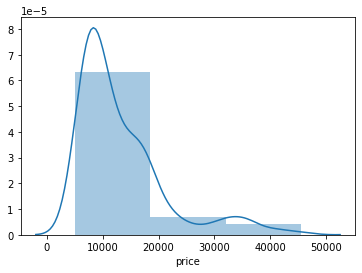

In [37]:
sb.distplot(car['price'],bins=3)

In [38]:
print("minimum =",car['price'].min())
print("maximum =",car['price'].max())
print("median =",car['price'].median())

minimum = 5118.0
maximum = 45400.0
median = 10295.0


In [39]:
# create  a function to categories price 
def func(x):
    if (x>=5000 and x<=10000):
        return "low"
    elif(x>=10001 and x<=20000):
        return "medium"
    elif(x>=20001 and x<=45400):
        return "high"

In [40]:
# apply the function on  price column 
car['category']=car['price'].apply(func)


<ipython-input-40-ad4da78df0de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['category']=car['price'].apply(func)


In [41]:
car['category'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [42]:
#drop the car company column 
car=car.drop('car_company',axis=1)

In [43]:
# check header 
car.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,category
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,dohc,four,mpfi,medium
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,dohc,four,mpfi,medium
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,gas,std,hatchback,rwd,front,ohcv,six,mpfi,medium
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,gas,std,sedan,fwd,front,ohc,four,mpfi,medium
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,gas,std,sedan,4wd,front,ohc,five,mpfi,medium


### Dummy variable (One Hot Encoding)

In [44]:
cate_imp_col=['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber',
              'fuelsystem','category'] 


In [45]:
dummies=pd.get_dummies(data=car[cate_imp_col],drop_first=True)
dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_low,category_medium
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [46]:
# checking the number of rows and columns of dummies
dummies.shape

(205, 30)

In [47]:
# concating dummies with car data frame
car=pd.concat([car,dummies],axis=1)
car.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,category,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_low,category_medium
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,dohc,four,mpfi,medium,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,dohc,four,mpfi,medium,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,gas,std,hatchback,rwd,front,ohcv,six,mpfi,medium,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,gas,std,sedan,fwd,front,ohc,four,mpfi,medium,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,gas,std,sedan,4wd,front,ohc,five,mpfi,medium,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [48]:
car.shape

(205, 49)

In [49]:
# drop all the categorical columns which are used in dummies
car=car.drop(cate_imp_col,axis=1)
car.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_low,category_medium
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [50]:
car.shape

(205, 40)

In [51]:
car.isnull().sum()

price                    0
wheelbase                0
carlength                0
carwidth                 0
curbweight               0
enginesize               0
boreratio                0
horsepower               0
citympg                  0
highwaympg               0
fueltype_gas             0
aspiration_turbo         0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_fwd           0
drivewheel_rwd           0
enginelocation_rear      0
enginetype_dohcv         0
enginetype_l             0
enginetype_ohc           0
enginetype_ohcf          0
enginetype_ohcv          0
enginetype_rotor         0
cylindernumber_five      0
cylindernumber_four      0
cylindernumber_six       0
cylindernumber_three     0
cylindernumber_twelve    0
cylindernumber_two       0
fuelsystem_2bbl          0
fuelsystem_4bbl          0
fuelsystem_idi           0
fuelsystem_mfi           0
fuelsystem_mpfi          0
fuelsystem_spdi          0
f

### Splitting the data into Training and Testing sets

In [52]:
car_train,car_test =train_test_split(car,test_size=0.25,random_state=10)

In [53]:
print(len(car_train))

153


In [54]:
print(len(car_test))

52


In [55]:
car_train.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_low,category_medium
7,18920.0,105.8,192.7,71.4,2954,136,3.19,110,19,25,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
26,7609.0,93.7,157.3,63.8,1989,90,2.97,68,31,38,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
55,10945.0,95.3,169.0,65.7,2380,70,3.33,101,17,23,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
69,28176.0,106.7,187.5,70.3,3495,183,3.58,123,22,25,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
59,8845.0,98.8,177.8,66.5,2385,122,3.39,84,26,32,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [56]:
car_train.describe([.80,.90,.95])

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_low,category_medium
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.000000,153.000000
mean,13002.255993,98.493464,173.266013,65.767320,2516.470588,124.013072,3.312941,101.294118,25.411765,31.019608,0.921569,0.176471,0.032680,0.333333,0.483660,0.117647,0.620915,0.333333,0.013072,0.0,0.052288,0.751634,0.078431,0.052288,0.013072,0.045752,0.803922,0.104575,0.006536,0.0,0.013072,0.339869,0.013072,0.078431,0.006536,0.457516,0.045752,0.0,0.522876,0.352941
std,8090.495397,5.942063,12.643436,2.102937,502.577986,39.924763,0.271879,36.134231,6.550943,6.869527,0.269732,0.382472,0.178381,0.472953,0.501374,0.323248,0.486753,0.472953,0.113956,0.0,0.223337,0.433484,0.269732,0.223337,0.113956,0.209632,0.398332,0.307010,0.080845,0.0,0.113956,0.475220,0.113956,0.269732,0.080845,0.499828,0.209632,0.0,0.501117,0.479454
min,5118.000000,86.600000,141.100000,60.300000,1488.000000,61.000000,2.540000,48.000000,14.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,9980.000000,96.600000,172.400000,65.400000,2403.000000,110.000000,3.270000,94.000000,24.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
80%,17581.400000,103.500000,186.600000,67.200000,3018.400000,146.000000,3.620000,121.000000,31.000000,37.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000
90%,21911.400000,107.900000,188.800000,68.400000,3148.600000,172.600000,3.620000,160.000000,31.000000,38.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.800000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000
95%,33190.400000,109.460000,193.140000,70.300000,3426.000000,200.000000,3.780000,178.400000,37.000000,42.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.400000,1.000000,1.000000,0.400000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000
max,45400.000000,120.900000,208.100000,72.000000,4066.000000,308.000000,3.940000,207.000000,49.000000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


<AxesSubplot:ylabel='price'>

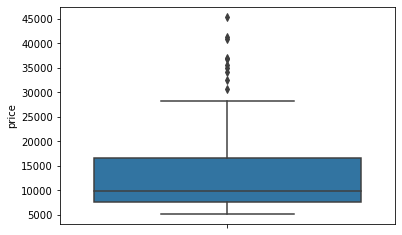

In [57]:
sb.boxplot(y=car_train['price'])

### Feature scalling

In [58]:
z_scale= MinMaxScaler()

In [59]:
num_val=['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
         'citympg','highwaympg']

In [60]:
# scaling on the some columns 
car_train[num_val]=z_scale.fit_transform(car_train[num_val])

<ipython-input-60-fc45f30e0881>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_train[num_val]=z_scale.fit_transform(car_train[num_val])
c:\python 3.8\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [61]:
car_train.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_low,category_medium
7,0.342634,0.559767,0.770149,0.948718,0.568658,0.303644,0.464286,0.389937,0.142857,0.236842,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
26,0.061839,0.206997,0.241791,0.299145,0.194337,0.117409,0.307143,0.125786,0.485714,0.578947,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
55,0.144655,0.253644,0.416418,0.461538,0.346005,0.036437,0.564286,0.333333,0.085714,0.184211,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
69,0.572414,0.586006,0.692537,0.854701,0.778510,0.493927,0.742857,0.471698,0.228571,0.236842,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
59,0.092523,0.355685,0.547761,0.529915,0.347944,0.246964,0.607143,0.226415,0.342857,0.421053,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


### Divided the  train data into X and Y

In [62]:
y_train= car_train.pop('price')
x_train=car_train

In [63]:
y_train[:10]

7      0.342634
26     0.061839
55     0.144655
69     0.572414
59     0.092523
190    0.120699
204    0.434611
72     0.743210
130    0.103694
24     0.027581
Name: price, dtype: float64

In [64]:
x_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_low,category_medium
7,0.559767,0.770149,0.948718,0.568658,0.303644,0.464286,0.389937,0.142857,0.236842,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
26,0.206997,0.241791,0.299145,0.194337,0.117409,0.307143,0.125786,0.485714,0.578947,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
55,0.253644,0.416418,0.461538,0.346005,0.036437,0.564286,0.333333,0.085714,0.184211,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
69,0.586006,0.692537,0.854701,0.778510,0.493927,0.742857,0.471698,0.228571,0.236842,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
59,0.355685,0.547761,0.529915,0.347944,0.246964,0.607143,0.226415,0.342857,0.421053,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [65]:
x_train.shape

(153, 39)

### Model building with RFE (Coarse Tunning)

In [66]:
lm=LinearRegression()
lm.fit(x_train,y_train)



LinearRegression()

In [67]:
rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

c:\python 3.8\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


rfe.support_

In [68]:
rfe.ranking_

array([ 1, 12, 13,  1,  1,  1,  1, 11,  1,  9, 10,  5,  6,  8,  7, 16, 17,
        1, 23,  4,  3,  2, 14, 20,  1,  1,  1,  1, 24, 19, 18, 21, 15,  1,
       22,  1, 25,  1,  1])

In [69]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 12),
 ('carwidth', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('citympg', False, 11),
 ('highwaympg', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 10),
 ('carbody_hardtop', False, 5),
 ('carbody_hatchback', False, 6),
 ('carbody_sedan', False, 8),
 ('carbody_wagon', False, 7),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 17),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 23),
 ('enginetype_l', False, 4),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', False, 14),
 ('enginetype_rotor', False, 20),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', False, 24),
 ('cylindernumber_two', False, 19),
 ('fuelsystem_2bbl', False, 18),
 ('fuelsystem_4bbl', False, 21),
 ('fue

In [70]:
# main 15 columns with high ranking in RFE(recursive feature elimination)
col=x_train.columns[rfe.support_]
col

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'highwaympg', 'enginelocation_rear', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'fuelsystem_mfi', 'fuelsystem_spdi', 'category_low', 'category_medium'],
      dtype='object')

In [71]:
# all the unnecessary columns
x_train.columns[~rfe.support_]

Index(['carlength', 'carwidth', 'citympg', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spfi'],
      dtype='object')

In [72]:
x_train_rfe=x_train[col]
x_train_rfe.shape

(153, 15)

### Building model using statsmodel

In [73]:
linear_model=sm.OLS(y_train,x_train_rfe).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              291.3
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    1.88e-96
Time:                        21:14:55   Log-Likelihood:                          244.37
No. Observations:                 153   AIC:                                     -458.7
Df Residuals:                     138   BIC:                                     -413.3
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
wheelbase                0.1049      0.047      2.251      0.026       0.013       0.197
curbweight               0.2698      0.070      3.848      0.000       0.131       0.408
enginesize               0.2772      0.075      3.705      0.000       0.129       0.425
boreratio               -0.0422      0.034     -1.238      0.218      -0.110       0.025
horsepower               0.3863      0.050      7.709      0.000       0.287       0.485
highwaympg               0.2721      0.046      5.930      0.000       0.181       0.363
enginelocation_rear      0.1433      0.046      3.125      0.002       0.053       0.234
cylindernumber_five     -0.0448      0.030     -1.516      0.132      -0.103       0.014
cylindernumber_four     -0.0500      0.029     -1.717      0.088      -0.108       0.008
cylindernumber_six      -0.1148      0.027     -4.266      0.000      -0.168      -0.062
cylindernumber_three    -0.0401      0.067     -0.601      0.549      -0.172       0.092
fuelsystem_mfi          -0.1074      0.054     -2.002      0.047      -0.213      -0.001
fuelsystem_spdi         -0.0526      0.022     -2.369      0.019      -0.097      -0.009
category_low            -0.2184      0.023     -9.696      0.000      -0.263      -0.174
category_medium         -0.1824      0.019     -9.412      0.000      -0.221      -0.144
==============================================================================
Omnibus:                       48.577   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.844
Skew:                           1.145   Prob(JB):                     6.55e-39
Kurtosis:                       7.726   Cond. No.                         33.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking Multicollinearity 

In [74]:
#check vif's
vif=pd.DataFrame()
x_vif=x_train_rfe
vif['Features']=x_train_rfe.columns
vif['VIF']=[round(variance_inflation_factor(x_vif.values,i),2) for i in range(x_vif.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,55.65
8,cylindernumber_four,39.18
2,enginesize,29.31
4,horsepower,23.64
3,boreratio,22.90
5,highwaympg,22.85
0,wheelbase,18.75
13,category_low,15.25
14,category_medium,7.62
9,cylindernumber_six,4.35


In [75]:
x_train_rfe2=x_train[col]

In [76]:
x_train_rfe2=x_train_rfe2.drop('cylindernumber_three',axis=1)

In [77]:
# create second model
linear_model=sm.OLS(y_train,x_train_rfe2).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              313.5
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    1.25e-97
Time:                        21:14:55   Log-Likelihood:                          244.17
No. Observations:                 153   AIC:                                     -460.3
Df Residuals:                     139   BIC:                                     -417.9
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
wheelbase               0.1028      0.046      2.216      0.028       0.011       0.194
curbweight              0.2687      0.070      3.842      0.000       0.130       0.407
enginesize              0.2882      0.072      3.980      0.000       0.145       0.431
boreratio              -0.0469      0.033     -1.414      0.160      -0.112       0.019
horsepower              0.3808      0.049      7.747      0.000       0.284       0.478
highwaympg              0.2573      0.039      6.654      0.000       0.181       0.334
enginelocation_rear     0.1449      0.046      3.170      0.002       0.055       0.235
cylindernumber_five    -0.0385      0.028     -1.396      0.165      -0.093       0.016
cylindernumber_four    -0.0401      0.024     -1.674      0.096      -0.087       0.007
cylindernumber_six     -0.1085      0.025     -4.387      0.000      -0.157      -0.060
fuelsystem_mfi         -0.1097      0.053     -2.055      0.042      -0.215      -0.004
fuelsystem_spdi        -0.0540      0.022     -2.452      0.015      -0.098      -0.010
category_low           -0.2188      0.022     -9.742      0.000      -0.263      -0.174
category_medium        -0.1830      0.019     -9.483      0.000      -0.221      -0.145
==============================================================================
Omnibus:                       48.861   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.009
Skew:                           1.157   Prob(JB):                     9.94e-39
Kurtosis:                       7.700   Cond. No.                         30.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#check vif's
vif=pd.DataFrame()
x2=x_train_rfe2
vif['Features']=x_train_rfe2.columns
vif['VIF']=[round(variance_inflation_factor(x2.values,i),2) for i in range(x2.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,55.61
2,enginesize,27.57
8,cylindernumber_four,26.65
4,horsepower,22.85
3,boreratio,21.73
0,wheelbase,18.64
5,highwaympg,16.30
12,category_low,15.23
13,category_medium,7.59
9,cylindernumber_six,3.69


In [79]:
x_train_rfe3=x2

In [80]:
# drop high pvalue column
x_train_rfe3=x_train_rfe3.drop('cylindernumber_five',axis=1)

In [81]:
# create third model
linear_model=sm.OLS(y_train,x_train_rfe3).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              335.2
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    1.75e-98
Time:                        21:14:56   Log-Likelihood:                          243.11
No. Observations:                 153   AIC:                                     -460.2
Df Residuals:                     140   BIC:                                     -420.8
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
wheelbase               0.0988      0.046      2.126      0.035       0.007       0.191
curbweight              0.2414      0.067      3.583      0.000       0.108       0.375
enginesize              0.3154      0.070      4.507      0.000       0.177       0.454
boreratio              -0.0463      0.033     -1.391      0.166      -0.112       0.019
horsepower              0.3691      0.049      7.595      0.000       0.273       0.465
highwaympg              0.2414      0.037      6.511      0.000       0.168       0.315
enginelocation_rear     0.1412      0.046      3.084      0.002       0.051       0.232
cylindernumber_four    -0.0207      0.020     -1.057      0.292      -0.059       0.018
cylindernumber_six     -0.0904      0.021     -4.277      0.000      -0.132      -0.049
fuelsystem_mfi         -0.1118      0.054     -2.088      0.039      -0.218      -0.006
fuelsystem_spdi        -0.0537      0.022     -2.431      0.016      -0.097      -0.010
category_low           -0.2243      0.022    -10.109      0.000      -0.268      -0.180
category_medium        -0.1856      0.019     -9.630      0.000      -0.224      -0.148
==============================================================================
Omnibus:                       49.259   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.085
Skew:                           1.169   Prob(JB):                     5.80e-39
Kurtosis:                       7.707   Cond. No.                         29.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#check vif's
vif=pd.DataFrame()
x3=x_train_rfe3
vif['Features']=x_train_rfe3.columns
vif['VIF']=[round(variance_inflation_factor(x3.values,i),2) for i in range(x3.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,51.28
2,enginesize,25.58
4,horsepower,22.18
3,boreratio,21.73
0,wheelbase,18.57
7,cylindernumber_four,17.70
5,highwaympg,14.88
11,category_low,14.77
12,category_medium,7.52
8,cylindernumber_six,2.68


In [83]:
x_train_rfe4=x3

In [84]:
# drop high pvalue column
x_train_rfe4=x_train_rfe4.drop('cylindernumber_four',axis=1)

In [85]:
# create four model
linear_model=sm.OLS(y_train,x_train_rfe4).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              362.7
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    1.56e-99
Time:                        21:14:57   Log-Likelihood:                          242.50
No. Observations:                 153   AIC:                                     -461.0
Df Residuals:                     141   BIC:                                     -424.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
wheelbase               0.0929      0.046      2.014      0.046       0.002       0.184
curbweight              0.2444      0.067      3.630      0.000       0.111       0.378
enginesize              0.3262      0.069      4.710      0.000       0.189       0.463
boreratio              -0.0607      0.030     -2.003      0.047      -0.121      -0.001
horsepower              0.3708      0.049      7.631      0.000       0.275       0.467
highwaympg              0.2307      0.036      6.466      0.000       0.160       0.301
enginelocation_rear     0.1389      0.046      3.036      0.003       0.048       0.229
cylindernumber_six     -0.0817      0.019     -4.196      0.000      -0.120      -0.043
fuelsystem_mfi         -0.1172      0.053     -2.198      0.030      -0.223      -0.012
fuelsystem_spdi        -0.0577      0.022     -2.650      0.009      -0.101      -0.015
category_low           -0.2338      0.020    -11.534      0.000      -0.274      -0.194
category_medium        -0.1929      0.018    -10.706      0.000      -0.228      -0.157
==============================================================================
Omnibus:                       50.139   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.602
Skew:                           1.214   Prob(JB):                     9.00e-38
Kurtosis:                       7.568   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
#check vif's
vif=pd.DataFrame()
x4=x_train_rfe4
vif['Features']=x_train_rfe4.columns
vif['VIF']=[round(variance_inflation_factor(x4.values,i),2) for i in range(x4.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,51.19
2,enginesize,25.03
4,horsepower,22.15
0,wheelbase,18.30
3,boreratio,18.05
5,highwaympg,13.77
10,category_low,12.32
11,category_medium,6.57
7,cylindernumber_six,2.27
6,enginelocation_rear,1.57


In [87]:
x_train_rfe5=x4

In [88]:
# drop high vif value column
x_train_rfe5=x_train_rfe5.drop('curbweight',axis=1)

In [89]:
# create fifth model
linear_model=sm.OLS(y_train,x_train_rfe5).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              363.4
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    4.29e-98
Time:                        21:14:57   Log-Likelihood:                          235.67
No. Observations:                 153   AIC:                                     -449.3
Df Residuals:                     142   BIC:                                     -416.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
wheelbase               0.1982      0.037      5.304      0.000       0.124       0.272
enginesize              0.4361      0.065      6.720      0.000       0.308       0.564
boreratio              -0.0427      0.031     -1.370      0.173      -0.104       0.019
horsepower              0.4228      0.048      8.740      0.000       0.327       0.518
highwaympg              0.2263      0.037      6.091      0.000       0.153       0.300
enginelocation_rear     0.1257      0.048      2.645      0.009       0.032       0.220
cylindernumber_six     -0.0807      0.020     -3.980      0.000      -0.121      -0.041
fuelsystem_mfi         -0.1229      0.056     -2.213      0.028      -0.233      -0.013
fuelsystem_spdi        -0.0563      0.023     -2.480      0.014      -0.101      -0.011
category_low           -0.2315      0.021    -10.963      0.000      -0.273      -0.190
category_medium        -0.1770      0.018     -9.720      0.000      -0.213      -0.141
==============================================================================
Omnibus:                       41.096   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.875
Skew:                           1.045   Prob(JB):                     6.89e-26
Kurtosis:                       6.716   Cond. No.                         19.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#check vif's
vif=pd.DataFrame()
x5=x_train_rfe5
vif['Features']=x_train_rfe5.columns
vif['VIF']=[round(variance_inflation_factor(x5.values,i),2) for i in range(x5.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,enginesize,20.25
3,horsepower,20.22
2,boreratio,17.56
4,highwaympg,13.75
9,category_low,12.31
0,wheelbase,11.06
10,category_medium,6.18
6,cylindernumber_six,2.27
5,enginelocation_rear,1.56
8,fuelsystem_spdi,1.24


In [91]:
x_train_rfe6=x5

In [92]:
# drop high pvalue column
x_train_rfe6=x_train_rfe6.drop('boreratio',axis=1)

In [93]:
# create sixth model
linear_model=sm.OLS(y_train,x_train_rfe6).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              397.1
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    5.31e-99
Time:                        21:14:58   Log-Likelihood:                          234.66
No. Observations:                 153   AIC:                                     -449.3
Df Residuals:                     143   BIC:                                     -419.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
wheelbase               0.1830      0.036      5.112      0.000       0.112       0.254
enginesize              0.4157      0.063      6.561      0.000       0.290       0.541
horsepower              0.4049      0.047      8.667      0.000       0.313       0.497
highwaympg              0.2218      0.037      5.976      0.000       0.148       0.295
enginelocation_rear     0.1140      0.047      2.431      0.016       0.021       0.207
cylindernumber_six     -0.0744      0.020     -3.756      0.000      -0.114      -0.035
fuelsystem_mfi         -0.1246      0.056     -2.238      0.027      -0.235      -0.015
fuelsystem_spdi        -0.0530      0.023     -2.340      0.021      -0.098      -0.008
category_low           -0.2381      0.021    -11.546      0.000      -0.279      -0.197
category_medium        -0.1838      0.018    -10.462      0.000      -0.219      -0.149
==============================================================================
Omnibus:                       36.417   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.869
Skew:                           0.944   Prob(JB):                     1.52e-21
Kurtosis:                       6.387   Cond. No.                         16.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#check vif's
vif=pd.DataFrame()
x6=x_train_rfe6
vif['Features']=x_train_rfe6.columns
vif['VIF']=[round(variance_inflation_factor(x6.values,i),2) for i in range(x6.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,enginesize,19.18
2,horsepower,18.75
3,highwaympg,13.65
8,category_low,11.67
0,wheelbase,10.09
9,category_medium,5.72
5,cylindernumber_six,2.16
4,enginelocation_rear,1.51
7,fuelsystem_spdi,1.23
6,fuelsystem_mfi,1.06


In [95]:
x_train_rfe7=x6

In [96]:
# drop highvif value column
x_train_rfe7=x_train_rfe7.drop('enginesize',axis=1)

In [97]:
# create seventh model
linear_model=sm.OLS(y_train,x_train_rfe7).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              337.8
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    3.98e-92
Time:                        21:14:59   Log-Likelihood:                          214.53
No. Observations:                 153   AIC:                                     -411.1
Df Residuals:                     144   BIC:                                     -383.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
wheelbase               0.3152      0.034      9.369      0.000       0.249       0.382
horsepower              0.6278      0.036     17.224      0.000       0.556       0.700
highwaympg              0.2871      0.041      7.063      0.000       0.207       0.367
enginelocation_rear     0.0848      0.053      1.598      0.112      -0.020       0.190
cylindernumber_six     -0.0710      0.023     -3.151      0.002      -0.115      -0.026
fuelsystem_mfi         -0.0948      0.063     -1.502      0.135      -0.219       0.030
fuelsystem_spdi        -0.0662      0.026     -2.584      0.011      -0.117      -0.016
category_low           -0.2775      0.022    -12.380      0.000      -0.322      -0.233
category_medium        -0.2394      0.018    -13.676      0.000      -0.274      -0.205
==============================================================================
Omnibus:                       32.302   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.200
Skew:                           0.927   Prob(JB):                     2.56e-15
Kurtosis:                       5.665   Cond. No.                         12.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
#check vif's
vif=pd.DataFrame()
x7=x_train_rfe7
vif['Features']=x_train_rfe7.columns
vif['VIF']=[round(variance_inflation_factor(x7.values,i),2) for i in range(x7.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,highwaympg,12.67
7,category_low,10.67
1,horsepower,8.83
0,wheelbase,6.90
8,category_medium,4.39
4,cylindernumber_six,2.15
3,enginelocation_rear,1.49
6,fuelsystem_spdi,1.22
5,fuelsystem_mfi,1.06


In [99]:
x_train_rfe8=x7

In [100]:
# drop high pvalue column
x_train_rfe8=x_train_rfe8.drop('enginelocation_rear',axis=1)

In [101]:
# create eighth model
linear_model=sm.OLS(y_train,x_train_rfe8).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              375.7
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    7.03e-93
Time:                        21:14:59   Log-Likelihood:                          213.19
No. Observations:                 153   AIC:                                     -410.4
Df Residuals:                     145   BIC:                                     -386.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
wheelbase              0.2934      0.031      9.486      0.000       0.232       0.355
horsepower             0.6541      0.033     20.001      0.000       0.589       0.719
highwaympg             0.3034      0.040      7.668      0.000       0.225       0.382
cylindernumber_six    -0.0712      0.023     -3.145      0.002      -0.116      -0.026
fuelsystem_mfi        -0.1016      0.063     -1.605      0.111      -0.227       0.023
fuelsystem_spdi       -0.0705      0.026     -2.753      0.007      -0.121      -0.020
category_low          -0.2851      0.022    -12.945      0.000      -0.329      -0.242
category_medium       -0.2461      0.017    -14.414      0.000      -0.280      -0.212
==============================================================================
Omnibus:                       23.767   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.322
Skew:                           0.764   Prob(JB):                     1.75e-09
Kurtosis:                       4.998   Cond. No.                         11.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
#check vif's
vif=pd.DataFrame()
x8=x_train_rfe8
vif['Features']=x_train_rfe8.columns
vif['VIF']=[round(variance_inflation_factor(x8.values,i),2) for i in range(x8.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,highwaympg,11.87
6,category_low,10.19
1,horsepower,7.03
0,wheelbase,5.77
7,category_medium,4.14
3,cylindernumber_six,2.15
5,fuelsystem_spdi,1.21
4,fuelsystem_mfi,1.05


In [103]:
x_train_rfe9=x8

In [104]:
# drop high pvalue column
x_train_rfe9=x_train_rfe9.drop('fuelsystem_mfi',axis=1)

In [105]:
# create ninth model
linear_model=sm.OLS(y_train,x_train_rfe9).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              424.4
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    1.18e-93
Time:                        21:15:00   Log-Likelihood:                          211.84
No. Observations:                 153   AIC:                                     -409.7
Df Residuals:                     146   BIC:                                     -388.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
wheelbase              0.3002      0.031      9.741      0.000       0.239       0.361
horsepower             0.6456      0.032     19.898      0.000       0.581       0.710
highwaympg             0.3042      0.040      7.647      0.000       0.226       0.383
cylindernumber_six    -0.0673      0.023     -2.974      0.003      -0.112      -0.023
fuelsystem_spdi       -0.0676      0.026     -2.632      0.009      -0.118      -0.017
category_low          -0.2858      0.022    -12.909      0.000      -0.330      -0.242
category_medium       -0.2479      0.017    -14.472      0.000      -0.282      -0.214
==============================================================================
Omnibus:                       23.962   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.995
Skew:                           0.777   Prob(JB):                     2.07e-09
Kurtosis:                       4.964   Cond. No.                         9.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
#check vif's
vif=pd.DataFrame()
x9=x_train_rfe9
vif['Features']=x_train_rfe9.columns
vif['VIF']=[round(variance_inflation_factor(x9.values,i),2) for i in range(x9.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,highwaympg,11.87
5,category_low,10.19
1,horsepower,6.85
0,wheelbase,5.67
6,category_medium,4.12
3,cylindernumber_six,2.13
4,fuelsystem_spdi,1.20


In [107]:
x_train_rfe10=x9

In [108]:
# drop high  vif value column
x_train_rfe10=x_train_rfe10.drop('highwaympg',axis=1)

In [109]:
# create tenth model
linear_model=sm.OLS(y_train,x_train_rfe10).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              348.9
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    2.74e-84
Time:                        21:15:00   Log-Likelihood:                          186.07
No. Observations:                 153   AIC:                                     -360.1
Df Residuals:                     147   BIC:                                     -342.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
wheelbase              0.3544      0.035     10.022      0.000       0.285       0.424
horsepower             0.5990      0.038     15.937      0.000       0.525       0.673
cylindernumber_six    -0.0245      0.026     -0.947      0.345      -0.076       0.027
fuelsystem_spdi       -0.0957      0.030     -3.189      0.002      -0.155      -0.036
category_low          -0.1320      0.011    -12.097      0.000      -0.154      -0.110
category_medium       -0.1644      0.016    -10.561      0.000      -0.195      -0.134
==============================================================================
Omnibus:                       14.501   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.769
Skew:                           0.558   Prob(JB):                     5.10e-05
Kurtosis:                       4.362   Cond. No.                         6.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
#check vif's
vif=pd.DataFrame()
x10=x_train_rfe10
vif['Features']=x_train_rfe10.columns
vif['VIF']=[round(variance_inflation_factor(x10.values,i),2) for i in range(x10.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,horsepower,6.61
0,wheelbase,5.36
5,category_medium,2.45
2,cylindernumber_six,2.00
4,category_low,1.78
3,fuelsystem_spdi,1.18


In [111]:
x_train_rfe11=x10

In [112]:
# drop high  pvalue column
x_train_rfe11=x_train_rfe11.drop('cylindernumber_six',axis=1)

In [113]:
# create eleventh model
linear_model=sm.OLS(y_train,x_train_rfe11).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              418.8
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                    1.99e-85
Time:                        21:15:01   Log-Likelihood:                          185.60
No. Observations:                 153   AIC:                                     -361.2
Df Residuals:                     148   BIC:                                     -346.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
wheelbase           0.3602      0.035     10.338      0.000       0.291       0.429
horsepower          0.5767      0.029     19.692      0.000       0.519       0.635
fuelsystem_spdi    -0.0899      0.029     -3.062      0.003      -0.148      -0.032
category_low       -0.1296      0.011    -12.212      0.000      -0.151      -0.109
category_medium    -0.1601      0.015    -10.764      0.000      -0.189      -0.131
==============================================================================
Omnibus:                       16.097   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.588
Skew:                           0.564   Prob(JB):                     4.58e-06
Kurtosis:                       4.608   Cond. No.                         5.91
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#check vif's
vif=pd.DataFrame()
x11=x_train_rfe11
vif['Features']=x_train_rfe11.columns
vif['VIF']=[round(variance_inflation_factor(x11.values,i),2) for i in range(x11.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,wheelbase,5.21
1,horsepower,4.01
4,category_medium,2.23
3,category_low,1.68
2,fuelsystem_spdi,1.13


In [115]:
y_train_pred=linear_model.predict(x_train_rfe11)

In [116]:
y_train_pred.head()

7     0.266400
26    0.017496
55    0.123507
69    0.483064
59    0.129076
dtype: float64

In [117]:
# residual error
res = y_train - y_train_pred

Text(0.5, 0, 'Error')

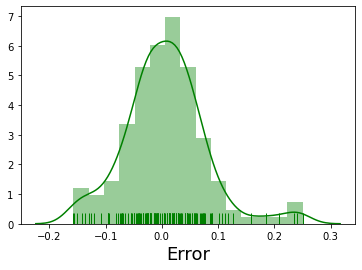

In [118]:
sb.distplot(res,rug=True,color='green')
plt.xlabel("Error",fontsize=18)

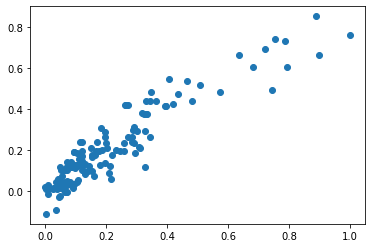

In [119]:
plt.scatter(y_train,y_train_pred)

### Making prediction  using Final model  ( Test set ) 

In [120]:
car_test.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_low,category_medium
131,9895.0,96.1,176.8,66.6,2460,132,3.46,90,23,31,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
117,18150.0,108.0,186.7,68.3,3130,134,3.61,142,18,24,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
63,10795.0,98.8,177.8,66.5,2443,122,3.39,64,36,42,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
56,11845.0,95.3,169.0,65.7,2380,70,3.33,101,17,23,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
49,36000.0,102.0,191.7,70.6,3950,326,3.54,262,13,17,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [121]:
car_test.shape

(52, 40)

In [122]:
car_test[num_val]=z_scale.transform(car_test[num_val])

<ipython-input-122-ef518fb1e14f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_test[num_val]=z_scale.transform(car_test[num_val])
c:\python 3.8\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [123]:
car_test.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_low,category_medium
131,0.118589,0.276968,0.532836,0.538462,0.377036,0.287449,0.657143,0.264151,0.257143,0.394737,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
117,0.323519,0.623907,0.680597,0.683761,0.636928,0.295547,0.764286,0.591195,0.114286,0.210526,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
63,0.140931,0.355685,0.547761,0.529915,0.370442,0.246964,0.607143,0.100629,0.628571,0.684211,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
56,0.166998,0.253644,0.416418,0.461538,0.346005,0.036437,0.564286,0.333333,0.085714,0.184211,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
49,0.766645,0.448980,0.755224,0.880342,0.955004,1.072874,0.714286,1.345912,-0.028571,0.026316,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


### dividing data into x_test and y_test

In [124]:
y_test=car_test.pop('price')
x_test=car_test

In [125]:
x_test.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_low,category_medium
131,0.276968,0.532836,0.538462,0.377036,0.287449,0.657143,0.264151,0.257143,0.394737,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
117,0.623907,0.680597,0.683761,0.636928,0.295547,0.764286,0.591195,0.114286,0.210526,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
63,0.355685,0.547761,0.529915,0.370442,0.246964,0.607143,0.100629,0.628571,0.684211,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
56,0.253644,0.416418,0.461538,0.346005,0.036437,0.564286,0.333333,0.085714,0.184211,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
49,0.448980,0.755224,0.880342,0.955004,1.072874,0.714286,1.345912,-0.028571,0.026316,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [126]:
y_test[:10]

131    0.118589
117    0.323519
63     0.140931
56     0.166998
49     0.766645
60     0.083834
19     0.029219
171    0.159649
163    0.072985
203    0.430763
Name: price, dtype: float64

In [127]:
x_test=x_test[x_train_rfe11.columns]
x_test.head()

,wheelbase,horsepower,fuelsystem_spdi,category_low,category_medium
131,0.276968,0.264151,0,1,0
117,0.623907,0.591195,0,0,1
63,0.355685,0.100629,0,0,1
56,0.253644,0.333333,0,0,1
49,0.448980,1.345912,0,0,0


In [128]:
y_test_pred=linear_model.predict(x_test)

In [129]:
res = y_test- y_test_pred
res

131   -0.003898
117   -0.082039
63     0.114867
56     0.043491
49    -0.171197
60    -0.045242
19    -0.003931
171   -0.050810
163    0.039836
203   -0.015845
5      0.048128
173   -0.100811
159    0.071308
114   -0.003366
129   -0.341877
101   -0.153967
61     0.037365
116    0.084507
1      0.193134
2     -0.024771
35    -0.021867
10     0.095363
167   -0.158242
178   -0.136920
6      0.046197
75    -0.186960
99    -0.064320
20     0.003020
39    -0.019657
102   -0.131625
95     0.037033
154    0.052278
52     0.030435
58     0.014514
70     0.080900
68     0.056487
46     0.056250
103   -0.153967
147    0.010142
76    -0.010769
176   -0.021928
160    0.019291
98     0.041904
127    0.110575
47    -0.067885
91     0.008484
83     0.042613
110   -0.083178
144   -0.000767
124   -0.009644
166   -0.075750
195   -0.059184
dtype: float64

Text(0.5, 0, 'Error')

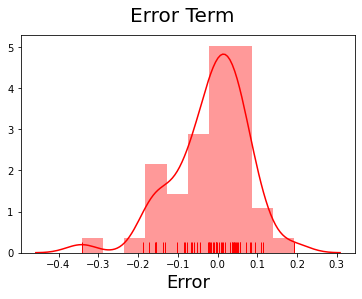

In [130]:
fig=plt.figure()
sb.distplot(res,rug=True,color='red')
fig.suptitle("Error Term",fontsize=20)
plt.xlabel('Error',fontsize=18)


### Model Evaluation

Text(0.5, 0, 'y_test')

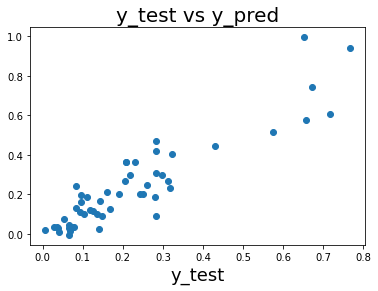

In [131]:
plt.title("y_test vs y_pred",fontsize=20)
plt.scatter(y_test,y_test_pred)
plt.xlabel("y_test",fontsize=18)
